## Week 4 Assignment - Data Exploration and Maps for Group Project
### I will explore LA City Metro Bus data, and how bus routes/stops relate to where seniors are living in LA.
#### Carolyn Pugh

### Getting Started

In [6]:
#import pandas and geopandas
import pandas as pd
import geopandas as gpd

### Pulling in LA Metro Bus Line Data

In [7]:
#read in Metro bus lines geojson file and create dataframe
metrobus = gpd.read_file('Metro_Bus_Lines.geojson')

<AxesSubplot: >

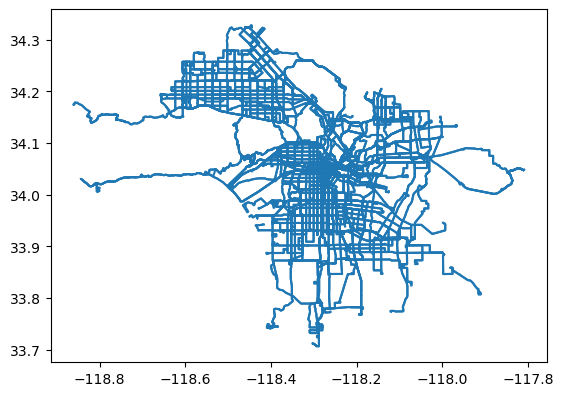

In [8]:
#What does it look like? Plot the MetroBus data
metrobus.plot()

### Getting LA City Blockgroup Boundaries

First, I need to import two files containing relevant spatial data - a geojson file showing the boundaries of the City of Los Angeles, since that is our geographic focus. Next, a geojson file that contains block groups for the entire County of Los Angeles, since the file with the City boundary does not contain the block group information.

In [14]:
#reading in the two spatial files and naming dataframes
city_bound = gpd.read_file('City_Boundaries.geojson')
#city_bound has the boundaries of all cities in LA County
blockgroups = gpd.read_file('Census_Block_Groups_2020.geojson')
#blockgroups has hte blockgroup boundaries for all of LA County

The "city_bound" dataframe has all city boundaries in LA, and I only want to look at the City of LA (not Santa Monica, for example). Therefore I only want a subset of this dataframe.

In [15]:
#Querying the city boundary dataframe to create a new LA only boundary.
city_boundLA = city_bound.query("CITY_NAME == 'Los Angeles'").copy()

<AxesSubplot: >

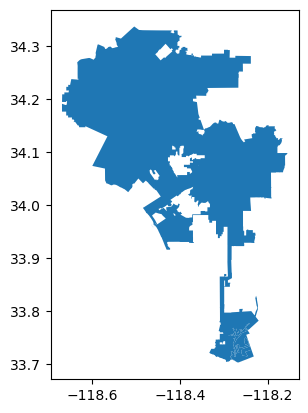

In [16]:
#Plotting the new dataframe to check that it worked.
city_boundLA.plot()

Next, I will use the "city_boundLA" dataframe to "clip" the LA county blockgroups dataframe, creating a new dataframe that contains blockgroup information for only LA city.

In [17]:
#Using "clip" to create a mask of the block boundary data and cut out everything that is outside LA city.
cityblockgroups = gpd.clip(blockgroups,city_boundLA)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

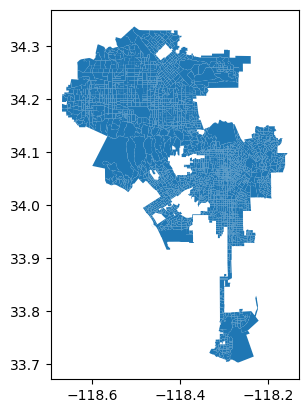

In [18]:
#Plotting the newly created clipped dataframe.
cityblockgroups.plot()

### Pulling in Census Data on Age (American Community Survey 2021)

In [20]:
#Using read to create new dataframe for age data.
age = pd.read_csv('age.csv')

#Using sample to display 5 random rows.
age.sample(5)

Geo_FIPS                                          Geo_QName  \
4187   60371112051  Block Group 1, Census Tract 1112.05, Los Angel...   
14421  60650426281  Block Group 1, Census Tract 426.28, Riverside ...   
7120   60374038022  Block Group 2, Census Tract 4038.02, Los Angel...   
24469  61010504011  Block Group 1, Census Tract 504.01, Sutter Cou...   
20857  60770052201  Block Group 1, Census Tract 52.20, San Joaquin...   

      Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
4187       ACSSF         ca         150            0         16134     NaN   
14421      ACSSF         ca         150            0         26368     NaN   
7120       ACSSF         ca         150            0         19067     NaN   
24469      ACSSF         ca         150            0         36416     NaN   
20857      ACSSF         ca         150            0         32804     NaN   

       Geo_REGION  Geo_DIVISION  ...  SE_A01001_004  SE_A01001_005  \
4187          NaN           NaN  ...             44             57   
14421         NaN           NaN  ...            184              0   
7120          NaN           NaN  ...             17              3   
24469         NaN           NaN  ...            191             10   
20857         NaN           NaN  ...            205            121   

       SE_A01001_006  SE_A01001_007  SE_A01001_008  SE_A01001_009  \
4187             192             97            203            230   
14421            149            222             43            255   
7120              41            121            100            162   
24469            232            214            292            136   
20857            342            192            391            388   

       SE_A01001_010  SE_A01001_011  SE_A01001_012  SE_A01001_013  
4187             170            196             54             16  
14421            114             13              0              0  
7120             192            103             13             25  
24469            145            131             34             35  
20857            245            158             55             10  

[5 rows x 68 columns]

In [23]:
#Converting FIPS codes to strings to keep the leading zero
age = pd.read_csv('age.csv',
                 dtype = 
                 {
                     'Geo_FIPS':str,
                     'Geo_STATE':str, 
                     'Geo_COUNTY':str
                 }
                )

#printing the first 3 rows to check that the FIPS codes have leading zeros now.
age.head(3)

Geo_FIPS                                          Geo_QName Geo_FILEID  \
0  060014001001  Block Group 1, Census Tract 4001, Alameda Coun...      ACSSF   
1  060014001002  Block Group 2, Census Tract 4001, Alameda Coun...      ACSSF   
2  060014002001  Block Group 1, Census Tract 4002, Alameda Coun...      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         150            0         11947     NaN         NaN   
1         ca         150            0         11948     NaN         NaN   
2         ca         150            0         11949     NaN         NaN   

   Geo_DIVISION  ...  SE_A01001_004 SE_A01001_005 SE_A01001_006  \
0           NaN  ...            243            57            98   
1           NaN  ...             29            19            14   
2           NaN  ...             52            32            31   

   SE_A01001_007  SE_A01001_008  SE_A01001_009  SE_A01001_010  SE_A01001_011  \
0            221            111            395            228            214   
1            121            186            139            311            226   
2            115            125            117            123            232   

   SE_A01001_012  SE_A01001_013  
0            116             67  
1             95             83  
2             70             17  

[3 rows x 68 columns]